<a href="https://colab.research.google.com/github/preetamjumech/text_analysis_using_selenium/blob/main/Preetam_Saha_09_10_2022_web_scrapping_restaurant_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kora -q
!pip install selenium

     |████████████████████████████████| 57 kB 2.7 MB/s 
     |████████████████████████████████| 1.6 MB 10.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 995 kB 4.2 MB/s 
     |████████████████████████████████| 140 kB 54.9 MB/s 
     |████████████████████████████████| 384 kB 49.2 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [2]:
import selenium
from kora.selenium import wd as browser
from selenium.webdriver.common.by import By
import pandas as pd 
import time
from datetime import date,datetime as dt
import datetime
from bs4 import BeautifulSoup
import numpy as np
import re 

In [3]:
url = "https://www.tripadvisor.in/Restaurant_Review-g304558-d1571770-Reviews-6_Ballygunge_Place-Kolkata_Calcutta_Kolkata_District_West_Bengal.html"

In [4]:
browser.get(url)

In [5]:
xx = browser.find_elements(By.XPATH,"//span[@class='taLnk ulBlueLinks']")

In [6]:
def click(x):
  try:
    x.click()
  except:
    pass

In [7]:
d_x = [click(x) for x in xx]

In [8]:
len(d_x)

12

In [9]:
containers = [x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH,"//div[@class='reviewSelector']")]

In [10]:
len(containers)

15

In [11]:
containers[0]

'<div class="rev_wrap ui_columns is-multiline"><div class="ui_column is-2 memberInfoColumn"><div class="prw_rup prw_reviews_member_info_resp" data-prwidget-name="reviews_member_info_resp" data-prwidget-init="handlers"><div class="member_info"><div id="UID_E889E4DFF16C616CAF70D604B81E2A14-SRC_860733429" class="memberOverlayLink clickable" onclick="widgetEvCall(\'handlers.initMemberOverlay\', event, this);" data-anchorwidth="90"><div class="avatar profile_E889E4DFF16C616CAF70D604B81E2A14"><div class="avatarWrapper"><a><div class="prw_rup prw_common_basic_image avatarImage" data-prwidget-name="common_basic_image" data-prwidget-init=""><div class="ui_avatar resp"> <img src="https://media-cdn.tripadvisor.com/media/photo-l/1a/f6/de/e7/default-avatar-2020-37.jpg" class="basicImg" data-mediaid="452386535"></div></div></a></div></div><div class="info_text pointer_cursor" onclick="widgetEvCall(\'handlers.usernameClick\', event, this);"><div>Bicchu14</div><div class="userLoc"><strong>London, Unit

In [12]:
data=[]

In [13]:
for container in containers:
  bsObj = BeautifulSoup(container)
  rev = bsObj.find(name = "div", attrs = {"class":"prw_rup prw_reviews_text_summary_hsx"}).text
  data.append(rev)

In [14]:
data

['Loved the food. Potoler dorma, hilsa preparation, noler gurer ice-cream were some of the delicacies that we enjoyed. Loved the ambiance and the speed of service. I would have given a 5 for the restaurant had it not been the persuasive gesture of paying the bill, before finishing the food. It seemed the staff were in a hurry to get the bill paid even when we were in the tailend of our meal... Awaiting the desserts to be served! A little patience would have been very appreciated.Show less',
 'If your looking for an authentic bengali cuisine then 6 ballygunge place is where you should be. The food is made in authentic bengali style. Wide buffet spread. The taste is superb. Must try is luchi and kosha mangsho along with aloo dum. The aam pora shorbot is yum. Overall great experience.Show less',
 "My wife is Bengali and I am very accustomed to her cooking. Having been to many Bengali parties hosted by our friends, I'm familiar enough to at least have a valid opinion. I ate at six differen

In [15]:
len(data)

15

In [16]:
data[0]

'Loved the food. Potoler dorma, hilsa preparation, noler gurer ice-cream were some of the delicacies that we enjoyed. Loved the ambiance and the speed of service. I would have given a 5 for the restaurant had it not been the persuasive gesture of paying the bill, before finishing the food. It seemed the staff were in a hurry to get the bill paid even when we were in the tailend of our meal... Awaiting the desserts to be served! A little patience would have been very appreciated.Show less'

In [17]:
dataset=[]

In [18]:
for i in range(1,40):
  c=15*i
  url=f"https://www.tripadvisor.in/Restaurant_Review-g304558-d1571770-Reviews-or{c}-6_Ballygunge_Place-Kolkata_Calcutta_Kolkata_District_West_Bengal.html"
  browser.get(url)
  xx = browser.find_elements(By.XPATH,"//span[@class='taLnk ulBlueLinks']")
  def click(x):
    try:
      x.click()
    except:
      pass
  d_x = [click(x) for x in xx]
  containers = [x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH,"//div[@class='reviewSelector']")]
  for container in containers:
    bsObj = BeautifulSoup(container)
    rev = bsObj.find(name = "div", attrs = {"class":"prw_rup prw_reviews_text_summary_hsx"}).text
    dataset.append(rev)

In [19]:
len(dataset)

585

In [20]:
dataset[0]

'The food is Awesome & the service too. MUST TRY the dav Chingri, sorshe elish & one more starter with lau pata Elish.'

In [21]:
data_res = pd.DataFrame(dataset,columns = ["Reviews"])

In [22]:
data_res.head()

,Reviews
0,The food is Awesome & the service too. MUST TR...
1,Rajarhat outlets - Staff behavior is very roug...
2,Went there with high hopes. Food is average an...
3,6Ballygunge Place is a favourite place of mine...
4,We have gone there for several times. On 15th ...


In [23]:
only_rev = " ".join(data_res["Reviews"])

In [24]:
only_rev

'The food is Awesome & the service too. MUST TRY the dav Chingri, sorshe elish & one more starter with lau pata Elish. Rajarhat outlets - Staff behavior is very rough, specially Manager, he doesn\'t know how to behave, we visit on 13/10/2021 at 1pm Went there with high hopes. Food is average and over priced. Dessert was mind blowing but the main course was just average. Its buffet during puna days. The spread is limited and the food is average. Only thing that stood out was the dessert which was typical bengali in nature and absolutely mind blowing. Wont go back again probably.Show less 6Ballygunge Place is a favourite place of mine and my family also. All foods are too good. The decoration of this restaurent is awesome. I loved this place. All staffs are too good. We have gone there for several times. On 15th April,2021 at Bengali Nababarsa we went at the Salt Lake outlet,had buffet mwal.All items were delicious. Ambience was good, service was excellent.We recommend every food lover t

In [25]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [27]:
#removing punctuations
only_reviews = re.sub(r'[^\w\s]','',only_rev)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
wc = WordCloud(width = 1200, height=800,max_words=200,background_color="white",stopwords=STOPWORDS)
wc

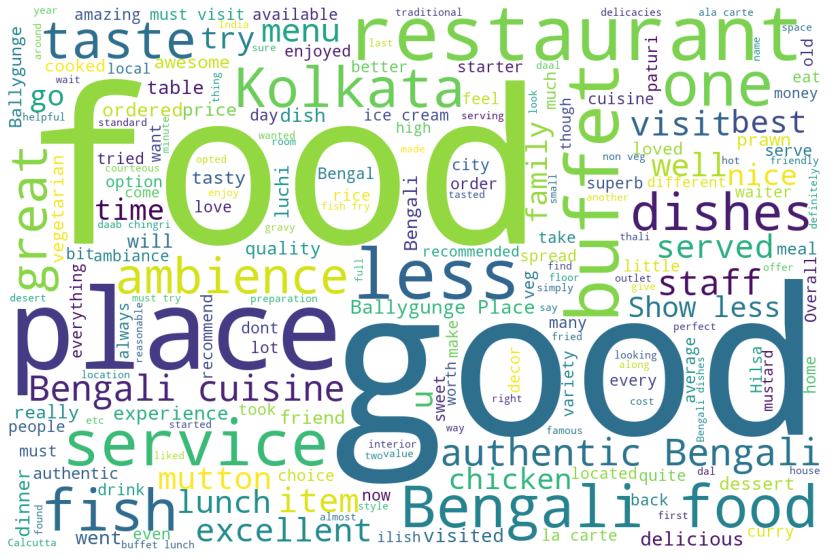

In [31]:
plt.figure(figsize=(15,10))
plt.imshow(wc.generate_from_text(only_reviews))
plt.axis("off")
plt.show()

In [32]:
s=list(STOPWORDS)+ ["Ballygunge","Bengali","kolkata","restaurant","food"]

In [34]:
wc1 = WordCloud(width = 1200, height=800,max_words=200,background_color="white",stopwords=s)
wc1

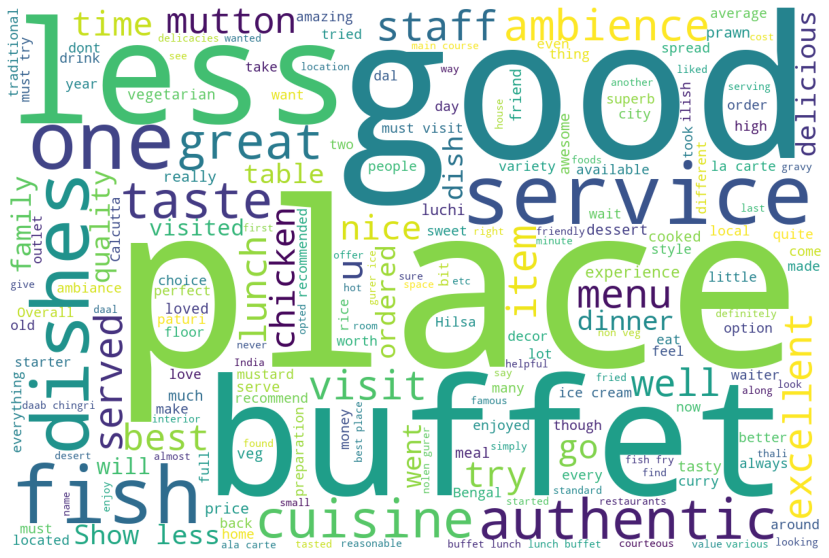

In [36]:
plt.figure(figsize=(15,10))
plt.imshow(wc1.generate_from_text(only_reviews))
plt.axis("off")
plt.show()